# Практическое задание № 2. Нейронные сети


**Работу выполнил:**

Дженжеруха Кирилл Андреевич, ИТМО ID: 368103

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras as tfk
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/AAI_PricesForecast/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/AAI_PricesForecast/test.csv')

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [5]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [6]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [7]:
missing_value_checker(test_edited)

[]
0


In [8]:
missing_value_checker(train_edited)

[]
0


In [9]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [10]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [11]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [12]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [14]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

In [15]:
y_train.shape

(1168,)

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow.

In [43]:
model = tfk.Sequential([
    tfk.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tfk.layers.LeakyReLU(),
    tfk.layers.Dense(67, activation='relu'),
    tfk.layers.Dense(37, activation='relu'),
    tfk.layers.Dense(1)
])
tf.random.set_seed(40)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.99),
              loss='msle',
              metrics=['mae', 'mse'])

In [45]:
history = model.fit(X_train, y_train, epochs=500, batch_size=16)

Epoch 1/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 24.1395 - mae: 176039.5000 - mse: 36680589312.0000
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1969 - mae: 169014.9062 - mse: 34071599104.0000
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7958 - mae: 157533.6719 - mse: 30108669952.0000
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4178 - mae: 139675.4844 - mse: 24566749184.0000
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1044 - mae: 115492.8438 - mse: 18018560000.0000
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4819 - mae: 88577.7578 - mse: 12434644992.0000
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2156 - mae: 64234.3086 - mse: 8842957824.0000
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1262 - mae: 50216.2109 - mse: 7435398656.0000
Epoch 9/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1065 - mae: 46600.2969 - mse: 7279600640.0000
Epoch 10/500
73/73 ━━━━━━

**Оцените полученные результаты**

          loss            mae           mse
0    18.097542  178498.609375  3.810952e+10
1     8.006041  170653.406250  3.518932e+10
2     4.188805  157802.937500  3.075166e+10
3     2.082694  138274.625000  2.466069e+10
4     0.949854  112749.132812  1.786702e+10
..         ...            ...           ...
495   0.013521   15796.690430  6.042294e+08
496   0.013455   15772.268555  6.013442e+08
497   0.013491   15770.433594  6.025120e+08
498   0.013419   15730.186523  5.983066e+08
499   0.013447   15776.650391  5.992374e+08

[500 rows x 3 columns]


Text(0.5, 1.0, 'MSE Value')

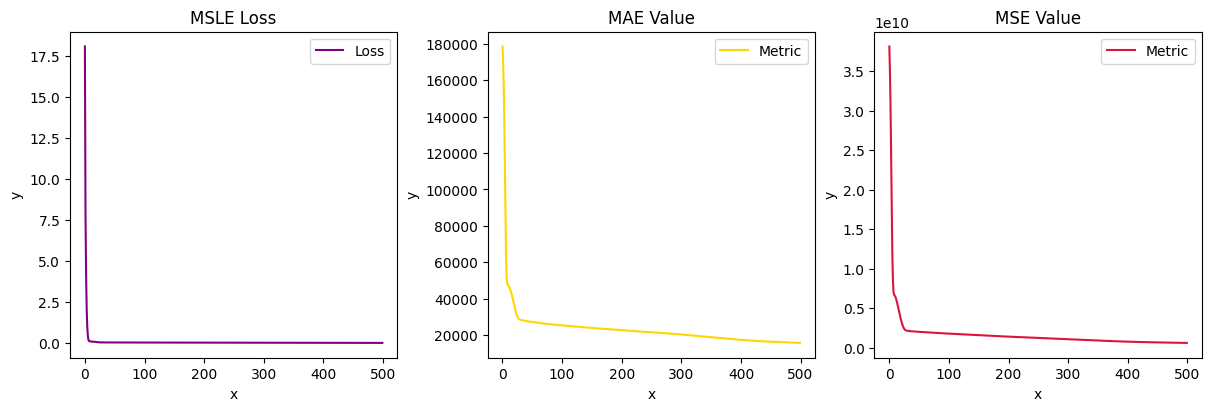

In [46]:
results = pd.DataFrame(history.history)
print(results)
fig, axs = plt.subplots(1, 3, figsize=(12, 4), layout='constrained')
axs[0].plot(results['loss'], label='Loss', color='purple')
axs[0].set_ylabel('y')
axs[0].set_xlabel('x')
axs[0].legend(loc='upper right', fontsize=10)
axs[0].set_title('MSLE Loss')
axs[1].plot(results['mae'], label='Metric', color='gold')
axs[1].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].legend(loc='upper right', fontsize=10)
axs[1].set_title('MAE Value')
axs[2].plot(results['mse'], label='Metric', color='crimson')
axs[2].set_ylabel('y')
axs[2].set_xlabel('x')
axs[2].legend(loc='upper right', fontsize=10)
axs[2].set_title('MSE Value')

Text(0.5, 1.0, 'MSLE Loss')

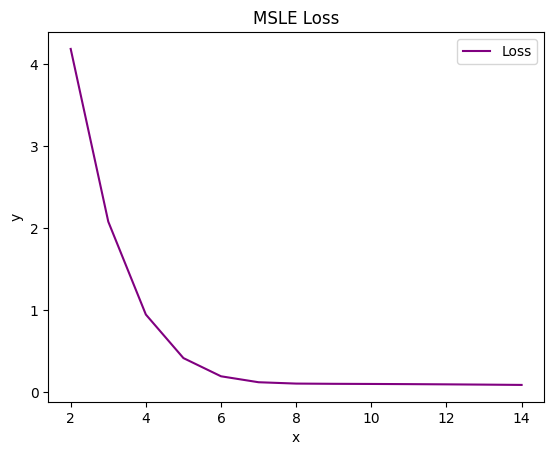

In [47]:
plt.plot(results['loss'][2:15], label='Loss', color='purple')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper right', fontsize=10)
plt.title('MSLE Loss')

Text(0.5, 1.0, 'MSLE Loss')

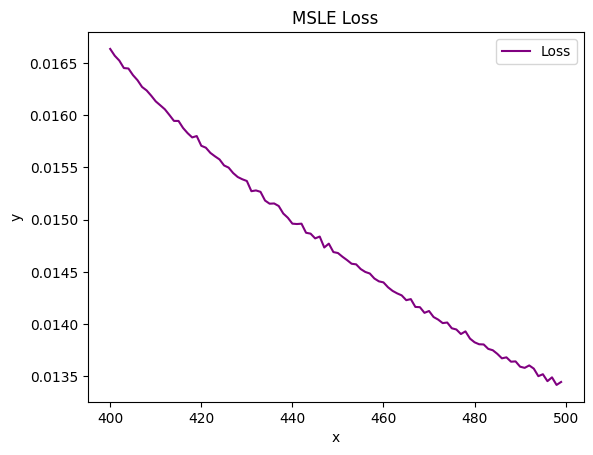

In [48]:
plt.plot(results['loss'][400:500], label='Loss', color='purple')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper right', fontsize=10)
plt.title('MSLE Loss')

### Прогнозирование

In [52]:
evaluation = model.evaluate(X_val, y_val, batch_size=16)
evaluation

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347 - mae: 22093.9727 - mse: 1443042560.0000


[0.0290171317756176, 20933.875, 1310570112.0]

In [54]:
preds = model.predict(test_edited, batch_size=16)
preds, preds.shape

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(array([[128206.19],
        [255546.06],
        [195460.16],
        ...,
        [205287.97],
        [157663.72],
        [251466.23]], dtype=float32),
 (1459, 1))

In [55]:
output = pd.DataFrame(
{
    'Id':test_data['Id'],
    'SalePrice': np.squeeze(preds)
})
output

,Id,SalePrice
0,1461,128206.187500
1,1462,255546.062500
2,1463,195460.156250
3,1464,215472.015625
4,1465,191482.000000
...,...,...
1454,2915,85733.765625
1455,2916,88729.937500
1456,2917,205287.968750
1457,2918,157663.718750


## Задание


В задние представлено логика выполнения с использование tensorflow/keras. Выполнять можно как с использованием tensorflow/keras, так и pytorch.


**При выполнении:**

Выведите отчет нейросетевой регрессионной модели, для  прогнозирование цены на жилье.


Подберите  разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Попробуйте использовать разное количество нейронов на входном слое. Опишите достигнутый результат.

Добавьте в нейронную сеть скрытый слой с разным количеством нейронов.

Используйте разное количество эпох. Опишите достигнутый результат.

Используйте разные размеры мини-выборки (batch_size). Опишите достигнутый результат.

Попробуйте использовать разные значения оптимизатора `optimizers` и функции потерь `loss`. Сравните полученные результаты.

**Вопросы:**

*Как вышеперечисленные параметры влияют на полученный вами результат?*

Если говорить про оптимизатор – выбор в результате сравнения нескольких вариантов пал на `Adam` – Adaptive Moment Estimation (также были попытки использовать SGD и др., но они не дали желаемого результата). *Adam* – один из градиентных методов оптимизации, использующий скользящие средние первого и второго моментов. Среди использованных параметров оптимизатора выделим `learning_rate` – определяет, насколько сильно обновляются параметры на каждом шаге, и напрямую влияет на стабильность и желаемую сходимость модели; `beta_1`, `beta_2` – коэффициенты для моментов, определяют насколько долго и насколько сильно учитываюются предыдущие значения. С учетом дополнительной эмпирической настройки параметров показал хорошую и достаточно быструю сходимость.

Количество нейронов в слоях нейросети позволяет найти баланс между сложностью и обобщающей способностью модели. Если нейронов в слоях будет недостаточно, будет присутствовать недообучение. Слишком большое количество нейронов, в свою очередь, может быть причиной переобучения – ситуации, в которой модель идеально предсказывает обучающие данные, но имеет большую ошибку на тестовых.

Аналогично с количеством эпох – слишком малое количество может привести к недообучению, слишком большое – к переобучению. Для подбора оптимального количества эпох можно использовать **early stopping** – прекращение обучения в момент, когда ошибка на валидации перестает уменьшаться. Эпохи также связаны с размерами выборок (`batch_size`) – маленькие батчи могут потребовать большего количества эпох, а частое обновление параметров может привести к большому кол-ву шумов. Большой батч, в свою очередь, зачастую более точен, но требует большего объема ресурсов. 

*Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?*

**Эпоха** — это более глобальный термин, описывающий цикл по всем данным, а **итерация** — это более локальная операция, связанная с шагом обновления модели. 

Эпоха — это полный цикл прохождения всех данных из обучающего набора через модель. Во время эпохи модель проходит по всему набору данных хотя бы один раз. Это необходимо для того, чтобы модель могла постепенно улучшать свои параметры (например, веса нейронной сети) на основе всей обучающей выборки.

Итерация — это процесс обновления параметров модели после обработки одной порции данных (batch-а) из обучающего набора. Во время итерации модель обновляет свои параметры на основе ошибки, рассчитанной для одной выборки.

*Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?*

**Функция активации** — это математическая функция, которая определяет выход нейрона в нейронной сети. Она добавляет нелинейность в модель, что позволяет сети решать сложные задачи. Функции активации позволяют модели изучать сложные паттерны в данных, ограничивают диапазон выходов нейронов, что помогает избежать численных переполнений и ускоряет обучение, а также могут улучшать ее сходимость за счет стабильного градиента. Функции активации используются после каждого слоя, чтобы передать обработанные данные следующему.

В качестве примеров функций активации можно привести: линейная функция (Linear Activation), сигмоида (Sigmoid) – хороша для бинарной классификации, ReLU (Rectified Linear Unit) – могут использоваться ее вариации GELU – популярна в BERT за счет улучшенной сходимости, LeakyReLU в качестве современных и более стабильных аналогов, Softmax и др.

Без функции активации нейронная сеть, состоящая из линейных слоев, была бы эквивалентна одной линейной модели, независимо от её глубины. Это ограничивает её способность моделировать сложные, нелинейные взаимосвязи в данных. 

*Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.*

**MSE** — это популярная функция потерь, используемая в задачах регрессии. Она измеряет среднее значение квадратов разностей между предсказанными значениями модели и истинными значениями: $$\operatorname{MSE} = \displaystyle \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2.$$ MSE чувствительна к выбросам и поэтому увеличивает влияние больших ошибок. Также MSE присущи гладкие градиенты, что делает ее более легко оптимизируемой.

**MAE**, в свою очередь – линейная функция потерь, а не квадратичная. Она считает среднее значение абсолютных разностей между предсказанными значениями и истинными значениями: $$\operatorname{MAE} = \displaystyle \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|.$$ MAE менее чувствительна к выбросам и более восприимчива к средним ошибкам, в отличие от MSE.

В общем и целом, MSE используется там, где выбросы более критичны, а MAE, напротив, может использоваться в ситуациях, когда можно расчитать примерные значения. Примерами таких задач могут быть задачи регрессии для вычисления стоимости акций/курсов валют (лучше использовать MSE, поскольку выбросы критичны) или для вычисления цен на жилье или транспорт (можно использовать MAE, поскольку более важными являются средние ошибки).